# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

In [85]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
def grafico_valor_activo(S0 = 100, m0 = 0.01, sig = 0.05, dt = 0.1, Dt = 1, N = 100):
    tf = N*Dt + dt
    ts = np.arange(0, tf, dt)
    dws = np.array([np.random.normal(0, dt) for t in ts])
    
    Ss = np.zeros(len(ts))
    Ss[0] = S0
    
    for i in range(1, len(ts)):
        S = Ss[i-1]
        ti = ts[i]
        dS = S*(m0*dt + sig*dws[i-1])
        Ss[i] = S + dS 
        
    #figura = plt.figure()
    #ejes = figura.add_axes()
    plotis = np.arange(0, len(ts), N)
    print(plotis)
    plotTs = np.zeros(len(plotis))
    plotSs = np.zeros(len(plotis))
    
    for j in range(len(plotis)):
        i = plotis[j]
        plotTs[j] = ts[i]
        plotSs[j] = Ss[i]
    
    plt.plot(plotTs, plotSs)
    
    plt.show()
    
    return ts, Ss

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350]


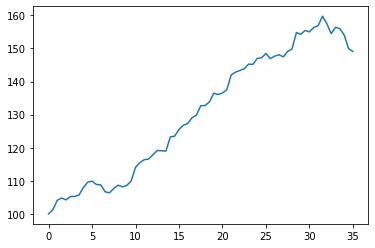

[   0  336  672 1008 1344 1680 2016 2352 2688 3024 3360]


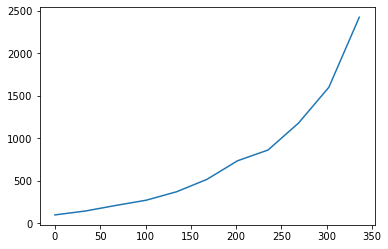

[   0   48   96  144  192  240  288  336  384  432  480  528  576  624
  672  720  768  816  864  912  960 1008 1056 1104 1152 1200 1248 1296
 1344 1392 1440 1488 1536 1584 1632 1680 1728 1776 1824 1872 1920 1968
 2016 2064 2112 2160 2208 2256 2304 2352 2400 2448 2496 2544 2592 2640
 2688 2736 2784 2832 2880 2928 2976 3024 3072 3120 3168 3216 3264 3312
 3360]


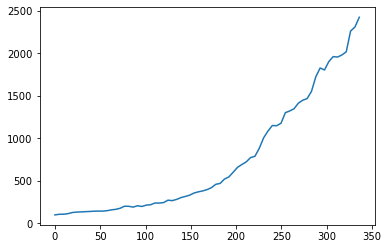

[   0  336  672 1008 1344 1680 2016 2352 2688 3024 3360]


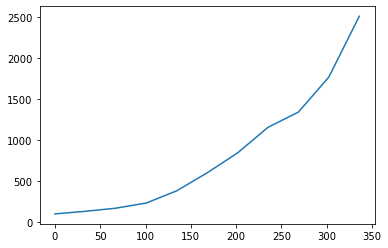

In [198]:
_= grafico_valor_activo(Dt = 7, N = 5)
_= grafico_valor_activo(Dt = 1, N = 4*7*12)
_= grafico_valor_activo(Dt = 7, N = 4*12)
_= grafico_valor_activo(Dt = 1, N = 4*7*12)

[     0     50    100 ... 499900 499950 500000]


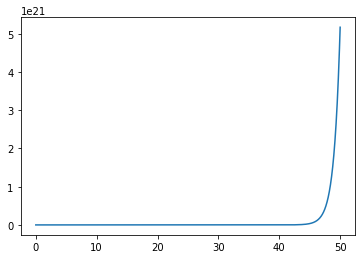

Para dt = 0.0001 , e** 50.0 calculado:	 5.171760815372338e+21
Para dt = 0.0001 , e** 50.0 real:		 5.184705528587072e+21
0.002496711364485371
[    0    50   100 ... 49900 49950 50000]


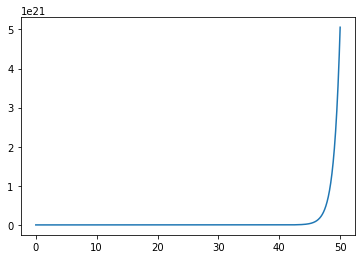

Para dt = 0.001 , e** 50.0 calculado:	 5.056778908767056e+21
Para dt = 0.001 , e** 50.0 real:		 5.184705528587072e+21
0.02467384485283941


In [199]:
def est_precis(ddt, Ene = 50):
    ts, Ss = grafico_valor_activo(S0 = 1, m0 = 1, sig = 0, dt = ddt, Dt = 1, N = Ene)
    t = ts[-1]
    exCalc = Ss[-1]
    exReal = np.exp(t)
    error = np.abs(exCalc/exReal - 1)
    print("Para dt =", ddt, ", e**", t, "calculado:\t", exCalc)
    print("Para dt =", ddt, ", e**", t, "real:\t\t", exReal)
    return error

print(est_precis(ddt = 0.0001))
print(est_precis(ddt = 0.001))
